In [64]:
import pandas as pd
import numpy as np

In [65]:
df = pd.read_csv("/content/train.csv")

In [66]:
df1=pd.read_csv("/content/test.csv")

In [67]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [70]:
import os


In [9]:
for dirname, _, filenames in os.walk(' /kaggle/input'):
  for filename in filename:
    print(os.path.join(dirname, filename))

In [10]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [71]:
df.label.unique()

array([1, 0, 4, 7, 3, 5, 8, 9, 2, 6])

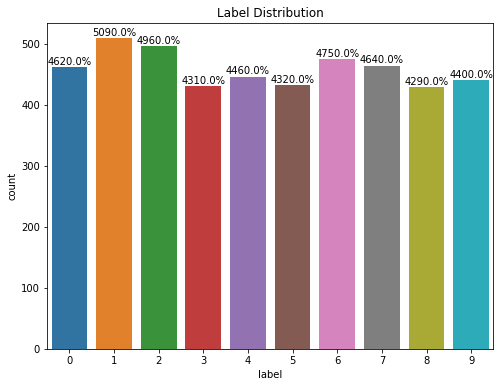

In [19]:
plt.figure(figsize=(8,6))
ax = sns.countplot(x='label', data=df)
plt.title("Label Distribution")
total=len(df.label.unique())
for p in ax.patches:
  percentage = f'{100 * p.get_height() / total:.1f}%\n'
  x = p.get_x() + p.get_width() / 2
  y = p.get_height()
  ax.annotate(percentage,  (x , y), ha='center', va = 'center' )



In [17]:
ax.patches

In [74]:
df.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

In [73]:
df.shape

(42000, 785)

In [75]:
df1.shape

(28000, 784)

In [76]:
pixels = df.columns.tolist()[1:]
df["sum"] = df[pixels].sum(axis=1)
df1["sum"] = df1[pixels].sum(axis=1)

In [77]:
df.groupby(['label'])['sum'].mean()

label
0    34632.407551
1    15188.466268
2    29871.099354
3    28320.188003
4    24232.722495
5    25835.920422
6    27734.917331
7    22931.244263
8    30184.148413
9    24553.750000
Name: sum, dtype: float64

In [78]:
df.dropna(inplace=True)

In [79]:
targets = df.label
features = df.drop("label", axis = 1)

In [80]:
from sklearn.preprocessing import StandardScaler

In [81]:
SC = StandardScaler()

In [82]:
features[:] = SC.fit_transform(features)

In [83]:
df1[:]=SC.transform(df1)

In [84]:
from sklearn.decomposition import PCA

In [85]:
sklearn_pca = PCA(n_components=2)

In [86]:
Y_sklearn = sklearn_pca.fit_transform(features)

In [87]:
features.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,sum
count,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,4.200000e+04,4.200000e+04,4.200000e+04,4.200000e+04,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,4.200000e+04,4.200000e+04,4.200000e+04,4.200000e+04,4.200000e+04,4.200000e+04,4.200000e+04,4.200000e+04,...,4.200000e+04,4.200000e+04,4.200000e+04,4.200000e+04,4.200000e+04,4.200000e+04,4.200000e+04,4.200000e+04,4.200000e+04,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,4.200000e+04,4.200000e+04,4.200000e+04,4.200000e+04,4.200000e+04,4.200000e+04,4.200000e+04,4.200000e+04,4.200000e+04,4.200000e+04,4.200000e+04,4.200000e+04,4.200000e+04,4.200000e+04,4.200000e+04,4.200000e+04,4.200000e+04,4.200000e+04,4.200000e+04,42000.0,42000.0,42000.0,42000.0,4.200000e+04
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.079382e-15,-2.176349e-15,-2.042775e-15,-2.044124e-15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.658343e-15,2.576197e-15,8.770324e-17,1.517708e-15,-1.186025e-15,4.548658e-16,-3.264067e-16,-1.027493e-16,...,-2.604563e-16,8.071949e-16,4.772981e-16,4.510281e-16,1.822652e-16,-6.147710e-16,-9.446127e-16,-2.650315e-17,-9.187636e-16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.286109e-15,-1.058153e-15,7.476987e-16,5.550588e-16,-2.053232e-16,-1.664283e-15,9.196192e-16,-3.983348e-15,2.116822e-16,-4.969566e-16,1.890099e-16,1.506913e-15,2.567548e-15,2.977753e-15,9.143428e-16,-3.418289e-16,-3.896631e-16,2.595291e-15,2.534348e-15,0.0,0.0,0.0,0.0,9.588098e-17
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,...,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,0.0,0.0,0.0,0.0,1.000012e+00
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-5.280635e-03,-6.878374e-03,-4.879558e-03,-4.879558e-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-4.879558e-03,-5.629181e-03,-9.320584e-03,-1.179981e-02,-1.630617e-02,-2.037525e-02,-2.595147e-02,-2.996432e-02,...,-1.201498e-01,-9.661002e-02,-7.550815e-02,-5.354694e-02,-3.703241e-02,-2.352055e-02,-1.345256e-02,-6.141994e-03,-4.879558e-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-6.467580e-03,-1.524284e-02,-2.093347e-02,-2.528976e-02,-3.051449e-02,-4.175440e-02,-4.633003e-02,-5.134639e-02,-5.516904e-02,-6.022829e-02,-5.635892e-02,-5.160765e-02,-4.279341e-02,-3.473660e-02,-2.527001e-02,-1.802557e-02,-1.147285e-02,-9.099140e-03,-6.896989e-03,0.0,0.0,0.0,0.0,-2.429096e+00
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-5.280635e-03,-6.878374e-03,-4.879558e-03,-4.879558e-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-4.879558e-03,-5.629181e-03,-9.320584e-03,-1.179981e-02,-1.630617e-02,-2.037525e-02,-2.595147e-02,-2.996432e-02,...,-1.201498e-01,-9.661002e-02,-7.55081

In [88]:
terget.describe()

NameError: ignored

In [89]:
targets

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

In [91]:
encoder = LabelEncoder()

In [93]:
targets[:]=encoder.fit_transform(targets[:])

In [94]:
targets

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

In [95]:
model = XGBClassifier(max_depth=5, objective= 'multi:softprob',n_estimator = 1000 , num_classes = 10)

In [96]:
X_train, X_test, y_train, y_test = train_test_split(features,targets, test_size=0.3, random_state=30)

In [97]:
history = model.fit(X_train, y_train, eval_set= [(X_test, y_test)], early_stopping_rounds = 50)

[0]	validation_0-merror:0.176111
Will train until validation_0-merror hasn't improved in 50 rounds.
[1]	validation_0-merror:0.145794
[2]	validation_0-merror:0.131984
[3]	validation_0-merror:0.121587
[4]	validation_0-merror:0.117619
[5]	validation_0-merror:0.112857
[6]	validation_0-merror:0.109921
[7]	validation_0-merror:0.106825
[8]	validation_0-merror:0.105873
[9]	validation_0-merror:0.101111
[10]	validation_0-merror:0.09619
[11]	validation_0-merror:0.093651
[12]	validation_0-merror:0.090476
[13]	validation_0-merror:0.089444
[14]	validation_0-merror:0.088571
[15]	validation_0-merror:0.086111
[16]	validation_0-merror:0.084206
[17]	validation_0-merror:0.082937
[18]	validation_0-merror:0.08127
[19]	validation_0-merror:0.079444
[20]	validation_0-merror:0.07873
[21]	validation_0-merror:0.076032
[22]	validation_0-merror:0.075238
[23]	validation_0-merror:0.07373
[24]	validation_0-merror:0.07246
[25]	validation_0-merror:0.072381
[26]	validation_0-merror:0.070873
[27]	validation_0-merror:0.070

In [98]:
df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,sum
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16649
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,44609
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13425
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15025
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,51093
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,29310
41996,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13415
41997,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,31504
41998,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26381


In [99]:
acc = accuracy_score(y_test, model.predict(X_test))
acc

0.9611904761904762

In [100]:
prediction = model.predict(df1)

In [101]:
prediction

array([2, 0, 9, ..., 3, 9, 2])

In [102]:
sample_submission=pd.read_csv('/content/sample_submission.csv')

In [103]:
sample_submission['Label'] = prediction

In [104]:
sample_submission.to_csv('submission.csv', index = False)